In [52]:
%matplotlib inline
from numpy import *
from scipy.optimize import fmin
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [53]:
g = 9.8

def get_traj(args):
    v, theta = args
    return lambda x: -g*x**2 / (2.0*v**2*cos(radians(theta))**2) + tan(radians(theta))*x

def get_cost(data):
    def cost(args):
        traj = get_traj(args)
        return sum((traj(x) - y)**2 for x, y in data)
    return cost

In [54]:
def graph(args):

    plt.show()

In [55]:
in2m = float64('2.54') / 100

Optimization terminated successfully.
         Current function value: 0.001821
         Iterations: 83
         Function evaluations: 156
[ 6.28414359 30.84034912]
13 k
Optimization terminated successfully.
         Current function value: 0.000276
         Iterations: 106
         Function evaluations: 204
[ 6.0690207  42.74970315]
40 b


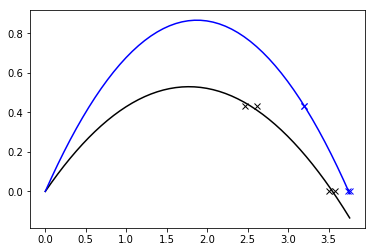

In [56]:
all_data = {
    13: [(138, 0), (141, 0), (97, 17), (103, 17)],
#    25: [(157, 0), (161, 0), (133, 17), (120, 17), (116, 17)],
    40: [(147, 0), (148, 0), (126, 17), (126, 17)],
}
all_data = {alpha: [(x * in2m, y*in2m) for x, y in data] for alpha, data in all_data.items()}
alphas = []
thetas = []
vs = []

max_x = max(max(x for x, y in data) for _, data in all_data.items())
xs = linspace(0, max_x)

plt.figure()

colors = list('cmyrgbk')
for alpha, data in all_data.items():
    v_theta = fmin(get_cost(data), array([63.0, 3.0]))

    alphas.append(alpha)
    print(v_theta)
    vs.append(v_theta[0])
    thetas.append(v_theta[1])

    color = colors.pop()
    print(alpha, color)
    traj = get_traj(v_theta)
    plt.plot(xs, traj(xs), color=color)
    data_xs, data_ys = zip(*data)
    plt.plot(data_xs, data_ys, marker='x', linestyle='', color=color)

plt.show()

In [57]:
theta_f = interp1d(alphas, thetas, kind='linear', copy=True)
print('done')
v_f = interp1d(alphas, vs, kind='linear', copy=True)

done


[ 6.18853342 36.13339536]


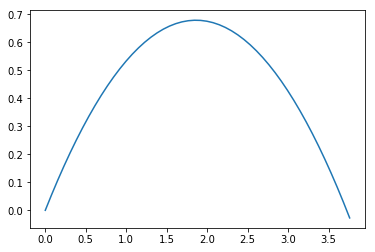

In [58]:
alpha = 25
args = array([v_f(25), theta_f(25)])
print(args)
xs = linspace(0, max_x)
plt.plot(xs, get_traj(args)(xs))

In [59]:
import pickle

with open('theta.pickle', 'wb') as f:
    pickle.dump(theta_f, f)

with open('v.pickle', 'wb') as f:
    pickle.dump(v_f, f)

In [68]:
get_to(135 * in2m, 10 * in2m)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 38


array([33.5748291])

In [69]:
get_to(200 * in2m, 0 * in2m)

ValueError: A value in x_new is below the interpolation range.